# A Sentiment Analysis of Yelp Reviews
## Author: Robert Surridge

### 1. Import necessary packages:

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rsurridge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load the dataset with a sample of 100,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [8]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=100_000)
for chunk in yelp_data:
    yelp_sample_unequal = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_unequal['length'] = yelp_sample_unequal['text'].apply(len)
yelp_sample_unequal['stars'] = yelp_sample_unequal['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_unequal.shape)

print()
print("Dataset Summary:")
yelp_sample_unequal.describe(include='all')



Shape of the dataset: (100000, 10)

Dataset Summary:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,100000,79345,9973,NaN,NaN,NaN,NaN,99964,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,Service was a little slow to start but improve...,NaN,NaN
freq,1,65,950,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,NaN,NaN,NaN,3.842910,0.898980,0.257180,0.347030,NaN,2015-05-02 14:36:08.625299968,548.438330
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,3.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-12-07 13:33:34.750000128,226.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-26 23:21:59.500000,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-04-08 12:26:05.249999872,693.000000
max,NaN,NaN,NaN,5.000000,320.000000,98.000000,49.000000,NaN,2018-10-04 18:22:35,5000.000000


In [20]:
unigram_vocab = (CountVectorizer(ngram_range=(1,1), stop_words='english')
                 .fit(yelp_sample_unequal.loc[:, 'text']))

print()
print("Number of possible words:", len(unigram_vocab.vocabulary_))

print()
print("Return unigram word from index 5000:", 
      unigram_vocab.get_feature_names_out()[5000])
print("Return unigram word from index 20000:", 
      unigram_vocab.get_feature_names_out()[20000])

bigram_vocab = (CountVectorizer(ngram_range = (2, 2), stop_words='english')
                .fit(yelp_sample_unequal.loc[:, 'text']))

print()
print("Number of possible words:", len(bigram_vocab.vocabulary_))

print()
print("Return unigram word from index 5000:", 
      bigram_vocab.get_feature_names_out()[5000])
print("Return unigram word from index 20000:", 
      bigram_vocab.get_feature_names_out()[20000])

trigram_vocab = (CountVectorizer(ngram_range = (3, 3), stop_words='english')
                .fit(yelp_sample_unequal.loc[:, 'text']))

print()
print("Number of possible words:", len(trigram_vocab.vocabulary_))

print()
print("Return unigram word from index 5000:", 
      trigram_vocab.get_feature_names_out()[5000])
print("Return unigram word from index 20000:", 
      trigram_vocab.get_feature_names_out()[20000])


Number of possible words: 67824

Return unigram word from index 5000: assaults
Return unigram word from index 20000: easiest

Number of possible words: 1976754

Return unigram word from index 5000: 12 terms
Return unigram word from index 20000: 550 calories

Number of possible words: 3934118

Return unigram word from index 5000: 10 people group
Return unigram word from index 20000: 20 uhh did


In [23]:
yelp_classify = yelp_sample_unequal.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_unequal = yelp_classify['text']
y_unequal = yelp_classify['stars']

unequal_count = y_unequal.value_counts()
min_count = unequal_count.min()
yelp_sample_equal = (yelp_sample_unequal.groupby('stars').apply(lambda x: x[:min_count]))
equal_count = yelp_sample_equal['stars'].value_counts()

x_equal = yelp_sample_equal['text']
y_equal = yelp_sample_equal['stars']

print()
print("Unequal star count (100,000 reviews)")
print(unequal_count)

print()
print("Equal star count (100,000 reviews)")
print(equal_count)



Shape of the dataset: (100000, 2)

Unequal star count (100,000 reviews)
stars
5.0    44392
4.0    25337
3.0    11362
1.0    10921
2.0     7988
Name: count, dtype: int64

Equal star count (100,000 reviews)
stars
1.0    7988
2.0    7988
3.0    7988
4.0    7988
5.0    7988
Name: count, dtype: int64


### 3. Plot histograms of review length frenquencies by the star rating:

Text(0.5, 1.0, 'Star Rating Frequency with a RAW Sample of One Million Reviews')

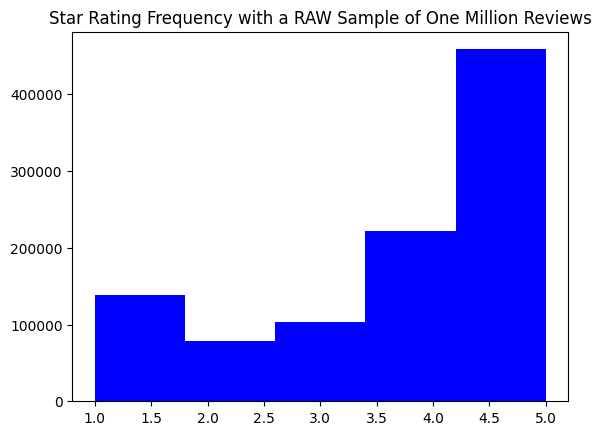

In [49]:
graph_star_freq_raw = plt.hist(yelp_sample_unequal['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a RAW Sample of One Million Reviews')

Text(0.5, 1.0, 'Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

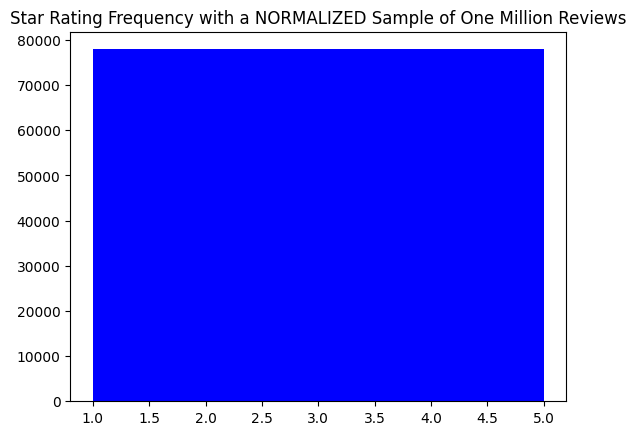

In [50]:
graph_star_freq_normal = plt.hist(yelp_sample_equal['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

We want to note here that our sample dataset is biased to more positive reviews than negative reviews. As a result, we should proceed with caution when classifying, training, and predicting with this dataset.

### 4 Classify reviews into different star classes and separate the dataset into X and Y subsets for prediction:

#### b.i.i. 100,000 equal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [24]:
yelp_classify = yelp_sample_equal.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_five_equal = yelp_classify['text']
y_five_equal = yelp_classify['stars']

unigram_five_equal = unigram_vocab.transform(x_five_equal)
(x_train_five_equal_unigram, 
 x_test_five_equal_unigram, 
 y_train_five_equal_unigram, 
 y_test_five_equal_unigram) = train_test_split(unigram_five_equal, 
                                                 y_five_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_five_equal = bigram_vocab.transform(x_five_equal)
(x_train_five_equal_bigram, 
 x_test_five_equal_bigram, 
 y_train_five_equal_bigram, 
 y_test_five_equal_bigram) = train_test_split(bigram_five_equal, 
                                                 y_five_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_five_equal = trigram_vocab.transform(x_five_equal)
(x_train_five_equal_trigram, 
 x_test_five_equal_trigram, 
 y_train_five_equal_trigram, 
 y_test_five_equal_trigram) = train_test_split(trigram_five_equal, 
                                               y_five_equal, 
                                               test_size=0.2, 
                                               random_state=101)


Shape of the dataset: (39940, 2)


#### b.i.ii. 100,000 unequal reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes:

In [25]:
yelp_classify = yelp_sample_unequal.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_five_unequal = yelp_classify['text']
y_five_unequal = yelp_classify['stars']

unigram_five_unequal = unigram_vocab.transform(x_five_unequal)
(x_train_five_unequal_unigram, 
 x_test_five_unequal_unigram, 
 y_train_five_unequal_unigram, 
 y_test_five_unequal_unigram) = train_test_split(unigram_five_unequal, 
                                                 y_five_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_five_unequal = bigram_vocab.transform(x_five_unequal)
(x_train_five_unequal_bigram, 
 x_test_five_unequal_bigram, 
 y_train_five_unequal_bigram, 
 y_test_five_unequal_bigram) = train_test_split(bigram_five_unequal, 
                                                 y_five_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_five_unequal = trigram_vocab.transform(x_five_unequal)
(x_train_five_unequal_trigram, 
 x_test_five_unequal_trigram, 
 y_train_five_unequal_trigram, 
 y_test_five_unequal_trigram) = train_test_split(trigram_five_unequal, 
                                               y_five_unequal, 
                                               test_size=0.2, 
                                               random_state=101)


Shape of the dataset: (100000, 2)


#### b.ii.i. 100,000 equal reviews into 1-star (negative) and 5-star (positive) classes:

In [26]:
yelp_classify = yelp_sample_equal.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_two_equal = data_classes['text']
y_two_equal = data_classes['stars']

unigram_two_equal = unigram_vocab.transform(x_two_equal)
(x_train_two_equal_unigram, 
 x_test_two_equal_unigram, 
 y_train_two_equal_unigram, 
 y_test_two_equal_unigram) = train_test_split(unigram_two_equal, 
                                                 y_two_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_two_equal = bigram_vocab.transform(x_two_equal)
(x_train_two_equal_bigram, 
 x_test_two_equal_bigram, 
 y_train_two_equal_bigram, 
 y_test_two_equal_bigram) = train_test_split(bigram_two_equal, 
                                                 y_two_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_two_equal = trigram_vocab.transform(x_two_equal)
(x_train_two_equal_trigram, 
 x_test_two_equal_trigram, 
 y_train_two_equal_trigram, 
 y_test_two_equal_trigram) = train_test_split(trigram_two_equal, 
                                               y_two_equal, 
                                               test_size=0.2, 
                                               random_state=101)


Shape of the dataset: (15976, 2)


#### b.ii.ii. 100,000 unequal reviews into 1-star (negative) and 5-star (positive) classes:

In [29]:
yelp_classify = yelp_sample_unequal.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_two_unequal = data_classes['text']
y_two_unequal = data_classes['stars']

unigram_two_unequal = unigram_vocab.transform(x_two_unequal)
(x_train_two_unequal_unigram, 
 x_test_two_unequal_unigram, 
 y_train_two_unequal_unigram, 
 y_test_two_unequal_unigram) = train_test_split(unigram_two_unequal, 
                                                 y_two_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_two_unequal = bigram_vocab.transform(x_two_unequal)
(x_train_two_unequal_bigram, 
 x_test_two_unequal_bigram, 
 y_train_two_unequal_bigram, 
 y_test_two_unequal_bigram) = train_test_split(bigram_two_unequal, 
                                                 y_two_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_two_unequal = trigram_vocab.transform(x_two_unequal)
(x_train_two_unequal_trigram, 
 x_test_two_unequal_trigram, 
 y_train_two_unequal_trigram, 
 y_test_two_unequal_trigram) = train_test_split(trigram_two_unequal, 
                                               y_two_unequal, 
                                               test_size=0.2, 
                                               random_state=101)


Shape of the dataset: (55313, 2)


#### b.iii.i. 100,000 equal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [30]:
yelp_classify = yelp_sample_equal.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_three_equal = data_classes['text']
y_three_equal = data_classes['stars']

unigram_three_equal = unigram_vocab.transform(x_three_equal)
(x_train_three_equal_unigram, 
 x_test_three_equal_unigram, 
 y_train_three_equal_unigram, 
 y_test_three_equal_unigram) = train_test_split(unigram_three_equal, 
                                                 y_three_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_three_equal = bigram_vocab.transform(x_three_equal)
(x_train_three_equal_bigram, 
 x_test_three_equal_bigram, 
 y_train_three_equal_bigram, 
 y_test_three_equal_bigram) = train_test_split(bigram_three_equal, 
                                                 y_three_equal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_three_equal = trigram_vocab.transform(x_three_equal)
(x_train_three_equal_trigram, 
 x_test_three_equal_trigram, 
 y_train_three_equal_trigram, 
 y_test_three_equal_trigram) = train_test_split(trigram_three_equal, 
                                               y_three_equal, 
                                               test_size=0.2, 
                                               random_state=101)


Shape of the dataset: (23964, 2)


#### b.iii.ii. 100,000 unequal reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes:

In [31]:
yelp_classify = yelp_sample_unequal.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_three_unequal = data_classes['text']
y_three_unequal = data_classes['stars']

unigram_three_unequal = unigram_vocab.transform(x_three_unequal)
(x_train_three_unequal_unigram, 
 x_test_three_unequal_unigram, 
 y_train_three_unequal_unigram, 
 y_test_three_unequal_unigram) = train_test_split(unigram_three_unequal, 
                                                 y_three_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)

bigram_three_unequal = bigram_vocab.transform(x_three_unequal)
(x_train_three_unequal_bigram, 
 x_test_three_unequal_bigram, 
 y_train_three_unequal_bigram, 
 y_test_three_unequal_bigram) = train_test_split(bigram_three_unequal, 
                                                 y_three_unequal, 
                                                 test_size=0.2, 
                                                 random_state=101)


trigram_three_unequal = trigram_vocab.transform(x_three_unequal)
(x_train_three_unequal_trigram, 
 x_test_three_unequal_trigram, 
 y_train_three_unequal_trigram, 
 y_test_three_unequal_trigram) = train_test_split(trigram_three_unequal, 
                                                  y_three_unequal, 
                                                  test_size=0.2, 
                                                  random_state=101)


Shape of the dataset: (66675, 2)


### 6. Vectorize reviews and split processed dataset into training and testing sets:

### 7. Modeling reviews with Multinomial Naive Bayes (since we're working with sparse data, we cannot rely on the Gaussian Naive Bayes assumptions)

#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb_5 = MultinomialNB()
mnb_5.fit(x_train_five_equal_unigram, y_train_five_equal_unigram)
predmnb = mnb_5.predict(x_test_five_equal_unigram)

print()
print("Unigram Score:", round(accuracy_score(y_test_five_equal_unigram, predmnb) * 100, 2))

print()
print("Unigram Classification Report:")
print(classification_report(y_test_five_equal_unigram, predmnb))

mnb_5.fit(x_train_five_equal_bigram, y_train_five_equal_bigram)
predmnb = mnb_5.predict(x_test_five_equal_bigram)

print()
print("Bigram Score:", round(accuracy_score(y_test_five_equal_bigram, predmnb) * 100, 2))

print()
print("Bigram Classification Report:")
print(classification_report(y_test_five_equal_bigram, predmnb))

mnb_5.fit(x_train_five_equal_trigram, y_train_five_equal_trigram)
predmnb = mnb_5.predict(x_test_five_equal_trigram)

print()
print("Trigram Score:", round(accuracy_score(y_test_five_equal_trigram, predmnb) * 100, 2))

print()
print("Trigram Classification Report:")
print(classification_report(y_test_five_equal_trigram, predmnb))


Unigram Score: 51.09

Unigram Classification Report:
              precision    recall  f1-score   support

         1.0       0.62      0.65      0.63      1626
         2.0       0.44      0.44      0.44      1584
         3.0       0.42      0.47      0.44      1650
         4.0       0.45      0.49      0.47      1596
         5.0       0.69      0.51      0.58      1532

    accuracy                           0.51      7988
   macro avg       0.52      0.51      0.51      7988
weighted avg       0.52      0.51      0.51      7988


Bigram Score: 49.07

Bigram Classification Report:
              precision    recall  f1-score   support

         1.0       0.66      0.61      0.64      1626
         2.0       0.43      0.48      0.45      1584
         3.0       0.40      0.47      0.43      1650
         4.0       0.41      0.42      0.42      1596
         5.0       0.61      0.47      0.53      1532

    accuracy                           0.49      7988
   macro avg       0.50  

#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [33]:
mnb_5 = MultinomialNB()
mnb_5.fit(x_train_five_unequal_unigram, y_train_five_unequal_unigram)
predmnb = mnb_5.predict(x_test_five_unequal_unigram)

print()
print("Unigram Score:", round(f1_score(y_test_five_unequal_unigram, predmnb, average='weighted') * 100, 2))

print()
print("Unigram Classification Report:")
print(classification_report(y_test_five_unequal_unigram, predmnb))

mnb_5 = MultinomialNB()
mnb_5.fit(x_train_five_unequal_bigram, y_train_five_unequal_bigram)
predmnb = mnb_5.predict(x_test_five_unequal_bigram)

print()
print("Bigram Score:", round(f1_score(y_test_five_unequal_bigram, predmnb, average='weighted') * 100, 2))

print()
print("Bigram Classification Report:")
print(classification_report(y_test_five_unequal_bigram, predmnb))

mnb_5 = MultinomialNB()
mnb_5.fit(x_train_five_unequal_trigram, y_train_five_unequal_trigram)
predmnb = mnb_5.predict(x_test_five_unequal_trigram)

print()
print("Trigram Score:", round(f1_score(y_test_five_unequal_trigram, predmnb, average='weighted') * 100, 2))

print()
print("Trigram Classification Report:")
print(classification_report(y_test_five_unequal_trigram, predmnb))


Unigram Score: 58.44

Unigram Classification Report:
              precision    recall  f1-score   support

         1.0       0.58      0.69      0.63      2168
         2.0       0.36      0.22      0.27      1566
         3.0       0.38      0.26      0.31      2339
         4.0       0.45      0.56      0.50      5026
         5.0       0.76      0.74      0.75      8901

    accuracy                           0.59     20000
   macro avg       0.51      0.49      0.49     20000
weighted avg       0.59      0.59      0.58     20000


Bigram Score: 54.61

Bigram Classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.67      0.66      2168
         2.0       0.31      0.12      0.18      1566
         3.0       0.32      0.16      0.21      2339
         4.0       0.40      0.46      0.43      5026
         5.0       0.69      0.79      0.74      8901

    accuracy                           0.57     20000
   macro avg       0.47  

#### b.ii.i. Modeling 100,000 (1-star and 5-star) equal reviews:

In [103]:
mnb_hund_2 = MultinomialNB()
mnb_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
predmnb = mnb_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, predmnb))


Score: 94.9

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1604
         5.0       0.95      0.94      0.95      1592

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [104]:
mnb_hund_2 = MultinomialNB()
mnb_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
predmnb = mnb_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, predmnb))


Score: 95.02

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.89      0.88      2207
         5.0       0.97      0.96      0.97      8856

    accuracy                           0.95     11063
   macro avg       0.92      0.93      0.92     11063
weighted avg       0.95      0.95      0.95     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [105]:
mnb_hund_3 = MultinomialNB()
mnb_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
predmnb = mnb_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, predmnb))


Score: 78.24

Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.80      0.81      1640
         3.0       0.68      0.78      0.73      1604
         5.0       0.87      0.77      0.81      1549

    accuracy                           0.78      4793
   macro avg       0.79      0.78      0.78      4793
weighted avg       0.79      0.78      0.78      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [106]:
mnb_hund_3 = MultinomialNB()
mnb_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
predmnb = mnb_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, predmnb, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, predmnb))


Score: 85.12

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.78      0.77      2231
         3.0       0.66      0.62      0.64      2272
         5.0       0.92      0.93      0.92      8832

    accuracy                           0.85     13335
   macro avg       0.78      0.78      0.78     13335
weighted avg       0.85      0.85      0.85     13335



### 9. Modeling reviews with Random Forest Classifier:

#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [120]:
from sklearn.ensemble import RandomForestClassifier
rmfr_hund_5 = RandomForestClassifier()
rmfr_hund_5.fit(x_train_hund_thou_five_equal, y_train_hund_thou_five_equal)
predrmfr = rmfr_hund_5.predict(x_test_hund_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_equal, predrmfr))


Score: 49.41

Classification Report:
              precision    recall  f1-score   support

         1.0       0.54      0.79      0.64      1626
         2.0       0.42      0.31      0.36      1584
         3.0       0.45      0.36      0.40      1650
         4.0       0.44      0.31      0.37      1596
         5.0       0.54      0.70      0.61      1532

    accuracy                           0.49      7988
   macro avg       0.48      0.50      0.48      7988
weighted avg       0.48      0.49      0.47      7988



#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [121]:
rmfr_hund_5 = RandomForestClassifier()
rmfr_hund_5.fit(x_train_hund_thou_five_unequal, y_train_hund_thou_five_unequal)
predrmfr = rmfr_hund_5.predict(x_test_hund_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_five_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_unequal, predrmfr))


Score: 46.84

Classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.57      0.63      2168
         2.0       0.39      0.02      0.04      1566
         3.0       0.47      0.06      0.10      2339
         4.0       0.40      0.22      0.28      5026
         5.0       0.56      0.95      0.71      8901

    accuracy                           0.55     20000
   macro avg       0.50      0.36      0.35     20000
weighted avg       0.51      0.55      0.47     20000



#### b.ii.i. 100,000 (1-star and 5-star) equal reviews:

In [122]:
rmfr_hund_2 = RandomForestClassifier()
rmfr_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
predrmfr = rmfr_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, predrmfr))


Score: 93.43

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94      1604
         5.0       0.96      0.91      0.93      1592

    accuracy                           0.93      3196
   macro avg       0.94      0.93      0.93      3196
weighted avg       0.94      0.93      0.93      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [123]:
rmfr_hund_2 = RandomForestClassifier()
rmfr_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
predrmfr = rmfr_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, predrmfr))


Score: 92.28

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.66      0.79      2207
         5.0       0.92      1.00      0.96      8856

    accuracy                           0.93     11063
   macro avg       0.95      0.83      0.87     11063
weighted avg       0.93      0.93      0.92     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [124]:
rmfr_hund_3 = RandomForestClassifier()
rmfr_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
predrmfr = rmfr_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, predrmfr))


Score: 77.88

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.85      0.82      1640
         3.0       0.75      0.67      0.70      1604
         5.0       0.79      0.82      0.80      1549

    accuracy                           0.78      4793
   macro avg       0.78      0.78      0.78      4793
weighted avg       0.78      0.78      0.78      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [125]:
rmfr_hund_3 = RandomForestClassifier()
rmfr_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
predrmfr = rmfr_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, predrmfr, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, predrmfr))


Score: 74.76

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.59      0.71      2231
         3.0       0.83      0.19      0.31      2272
         5.0       0.77      1.00      0.87      8832

    accuracy                           0.79     13335
   macro avg       0.83      0.59      0.63     13335
weighted avg       0.80      0.79      0.75     13335



### 10. Modeling reviews with the Decision Tree Classifier:

#### b.i.i. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) equal reviews:

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt_hund_5 = DecisionTreeClassifier()
dt_hund_5.fit(x_train_hund_thou_five_equal, y_train_hund_thou_five_equal)
preddt = dt_hund_5.predict(x_test_hund_thou_five_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_equal, preddt))


Score: 37.52

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.50      0.50      1626
         2.0       0.30      0.29      0.29      1584
         3.0       0.32      0.30      0.31      1650
         4.0       0.32      0.31      0.31      1596
         5.0       0.43      0.48      0.45      1532

    accuracy                           0.38      7988
   macro avg       0.37      0.38      0.37      7988
weighted avg       0.37      0.38      0.37      7988



#### b.i.ii. 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) unequal reviews:

In [140]:
dt_hund_5 = DecisionTreeClassifier()
dt_hund_5.fit(x_train_hund_thou_five_unequal, y_train_hund_thou_five_unequal)
preddt = dt_hund_5.predict(x_test_hund_thou_five_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_five_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five_unequal, preddt))


Score: 46.37

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.50      0.50      2168
         2.0       0.21      0.18      0.19      1566
         3.0       0.24      0.20      0.22      2339
         4.0       0.34      0.33      0.33      5026
         5.0       0.62      0.66      0.64      8901

    accuracy                           0.47     20000
   macro avg       0.38      0.37      0.38     20000
weighted avg       0.46      0.47      0.46     20000



#### b.ii.i. 100,000 (1-star and 5-star) equal reviews:

In [141]:
dt_hund_2 = DecisionTreeClassifier()
dt_hund_2.fit(x_train_hund_thou_two_equal, y_train_hund_thou_two_equal)
preddt = dt_hund_2.predict(x_test_hund_thou_two_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_equal, preddt))


Score: 85.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86      1604
         5.0       0.85      0.86      0.86      1592

    accuracy                           0.86      3196
   macro avg       0.86      0.86      0.86      3196
weighted avg       0.86      0.86      0.86      3196



#### b.ii.ii. 100,000 (1-star and 5-star) unequal reviews:

In [142]:
dt_hund_2 = DecisionTreeClassifier()
dt_hund_2.fit(x_train_hund_thou_two_unequal, y_train_hund_thou_two_unequal)
preddt = dt_hund_2.predict(x_test_hund_thou_two_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_two_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two_unequal, preddt))


Score: 89.38

Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73      2207
         5.0       0.93      0.94      0.93      8856

    accuracy                           0.89     11063
   macro avg       0.84      0.83      0.83     11063
weighted avg       0.89      0.89      0.89     11063



#### b.iii.i. 100,000 (1-star, 3-star, and 5-star) equal reviews:

In [143]:
dt_hund_3 = DecisionTreeClassifier()
dt_hund_3.fit(x_train_hund_thou_three_equal, y_train_hund_thou_three_equal)
preddt = dt_hund_3.predict(x_test_hund_thou_three_equal)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three_equal, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_equal, preddt))


Score: 64.3

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.68      0.69      1640
         3.0       0.57      0.56      0.56      1604
         5.0       0.65      0.70      0.67      1549

    accuracy                           0.64      4793
   macro avg       0.64      0.64      0.64      4793
weighted avg       0.64      0.64      0.64      4793



#### b.iii.ii. 100,000 (1-star, 3-star, and 5-star) unequal reviews:

In [144]:
dt_hund_3 = DecisionTreeClassifier()
dt_hund_3.fit(x_train_hund_thou_three_unequal, y_train_hund_thou_three_unequal)
preddt = dt_hund_3.predict(x_test_hund_thou_three_unequal)

print()
print("Score:", round(f1_score(y_test_hund_thou_three_unequal, preddt, average='weighted') * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three_unequal, preddt))


Score: 73.76

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.59      0.61      2231
         3.0       0.45      0.40      0.43      2272
         5.0       0.83      0.87      0.85      8832

    accuracy                           0.74     13335
   macro avg       0.64      0.62      0.63     13335
weighted avg       0.73      0.74      0.74     13335



From the above models, we can compare the accuracy scores:
* Multinomial Naive Bayes:
  * Equal 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 47.05  </span>| <span style='background:lightgreen'> 90.52  </span>   | <span style='background:lightgoldenrodyellow'> 74.67 </span> |
| 100,000   | <span style='background:lightcoral'> 52.77 </span> | <span style='background:lightgreen'> **94.9** </span> | <span style='background:lightgoldenrodyellow'> 78.24 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 78.24 </span>     | <span style='background:lightgreen'> 93.54 </span>    | <span style='background:lightgoldenrodyellow'> 79.66 </span> |


* Random Forest Classifier:
  * Equal 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 41.81 </span> | <span style='background:lightgreen'> 91.18 </span>     | <span style='background:lightgoldenrodyellow'> 70.09 </span> |
| 100,000   | <span style='background:lightcoral'> 49.67 </span> | <span style='background:lightgreen'> 93.71 </span>     | <span style='background:lightgoldenrodyellow'> 76.84 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 77.93 </span>     | <span style='background:lightgreen'> **94.64** </span> | <span style='background:lightgoldenrodyellow'> 79.98 </span> |

* Decision Tree Classifier:
  * Equal

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 30.14 </span> | <span style='background:lightgoldenrodyellow'> 77.45 </span>         | <span style='background:lightcoral'> 52.62 </span> |
| 100,000   | <span style='background:lightcoral'> 37.56 </span> | <span style='background:lightgreen'> 85.67 </span>     | <span style='background:lightgoldenrodyellow'> 63.78 </span>     |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 63.45 </span>     | <span style='background:lightgreen'> **88.18** </span> | <span style='background:lightgoldenrodyellow'> 67.77 </span>     |

Since the Multinomial Naive Bayes makes the most accurate prediction, let's use it to predict a sample positive, a sample neutral, and a sample negative review:

### 11. Classify a positive review:

In [ ]:
pos_rev = yelp_sample_equal_hund_thou['text'][5][1]
pos_rev_trans = vocab_hund_thou_two.transform([pos_rev])

print()
print("Sample positive review:")
print(pos_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][5][1])
print("Predicted Rating:", mnb_hund_2.predict(pos_rev_trans)[0])



Sample positive review:
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

Actual Rating:  5.0
Predicted Rating: 5.0


### 12. Classify a negative review:

In [ ]:
neg_rev = yelp_sample_equal_hund_thou['text'][1][5]
neg_rev_trans = vocab_hund_thou_two.transform([neg_rev])

print()
print("Sample negative review:")
print(neg_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][1][5])
print("Predicted Rating:", mnb_hund_2.predict(neg_rev_trans)[0])



Sample negative review:
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!

Actual Rating:  1.0
Predicted Rating: 1.0
